<a href="https://colab.research.google.com/github/Otobi1/Fuel-Effficiency-Prediction-End-to-End/blob/master/End_to_End_MPG_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predicting Fuel Efficiency of Vehicles 
"""
Overview of Mini Project 

Data collection, Problem Statement, Exploratory Data Analysis, Data Prep, Selecting and Training Models, Hyperparameter Tuning, Deployment using WebService 
"""

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

--2020-11-10 16:09:21--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.05s   

2020-11-10 16:09:21 (602 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the .data file using pandas 

cols = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]

df = pd.read_csv("./auto-mpg.data", names = cols, na_values = "?", comment = "\t", sep = " ", skipinitialspace = True)

data = df.copy()

In [ ]:
data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
122,24.0,4,121.0,110.0,2660.0,14.0,73,2
63,14.0,8,400.0,175.0,4385.0,12.0,72,1
317,34.3,4,97.0,78.0,2188.0,15.8,80,2
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
275,17.0,6,163.0,125.0,3140.0,13.6,78,2
296,27.4,4,121.0,80.0,2670.0,15.0,79,1
205,28.0,4,97.0,75.0,2155.0,16.4,76,3
376,37.0,4,91.0,68.0,2025.0,18.2,82,3
212,16.5,8,350.0,180.0,4380.0,12.1,76,1
116,16.0,8,400.0,230.0,4278.0,9.5,73,1


In [ ]:
# Problem Statement 

""" Predict MPG values for a vehicle given the other attributes of that vehicle """

In [ ]:
# Exploratory Data Analysis 

"""
Check data type columns, check for null values, check for outliers, look for category distribution in categorical columns, plot for correlation, look for new variables 

"""

In [ ]:
# check data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
# check for all the null values 

data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


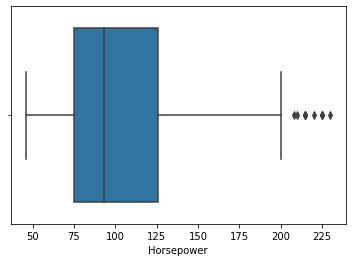

In [ ]:
sns.boxplot(x = data["Horsepower"])

In [ ]:
median = data["Horsepower"].median()
data["Horsepower"] = data["Horsepower"].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
# Category Distribution 

data["Cylinders"].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [ ]:
data["Origin"].value_counts() / len(data)

1    0.625628
3    0.198492
2    0.175879
Name: Origin, dtype: float64

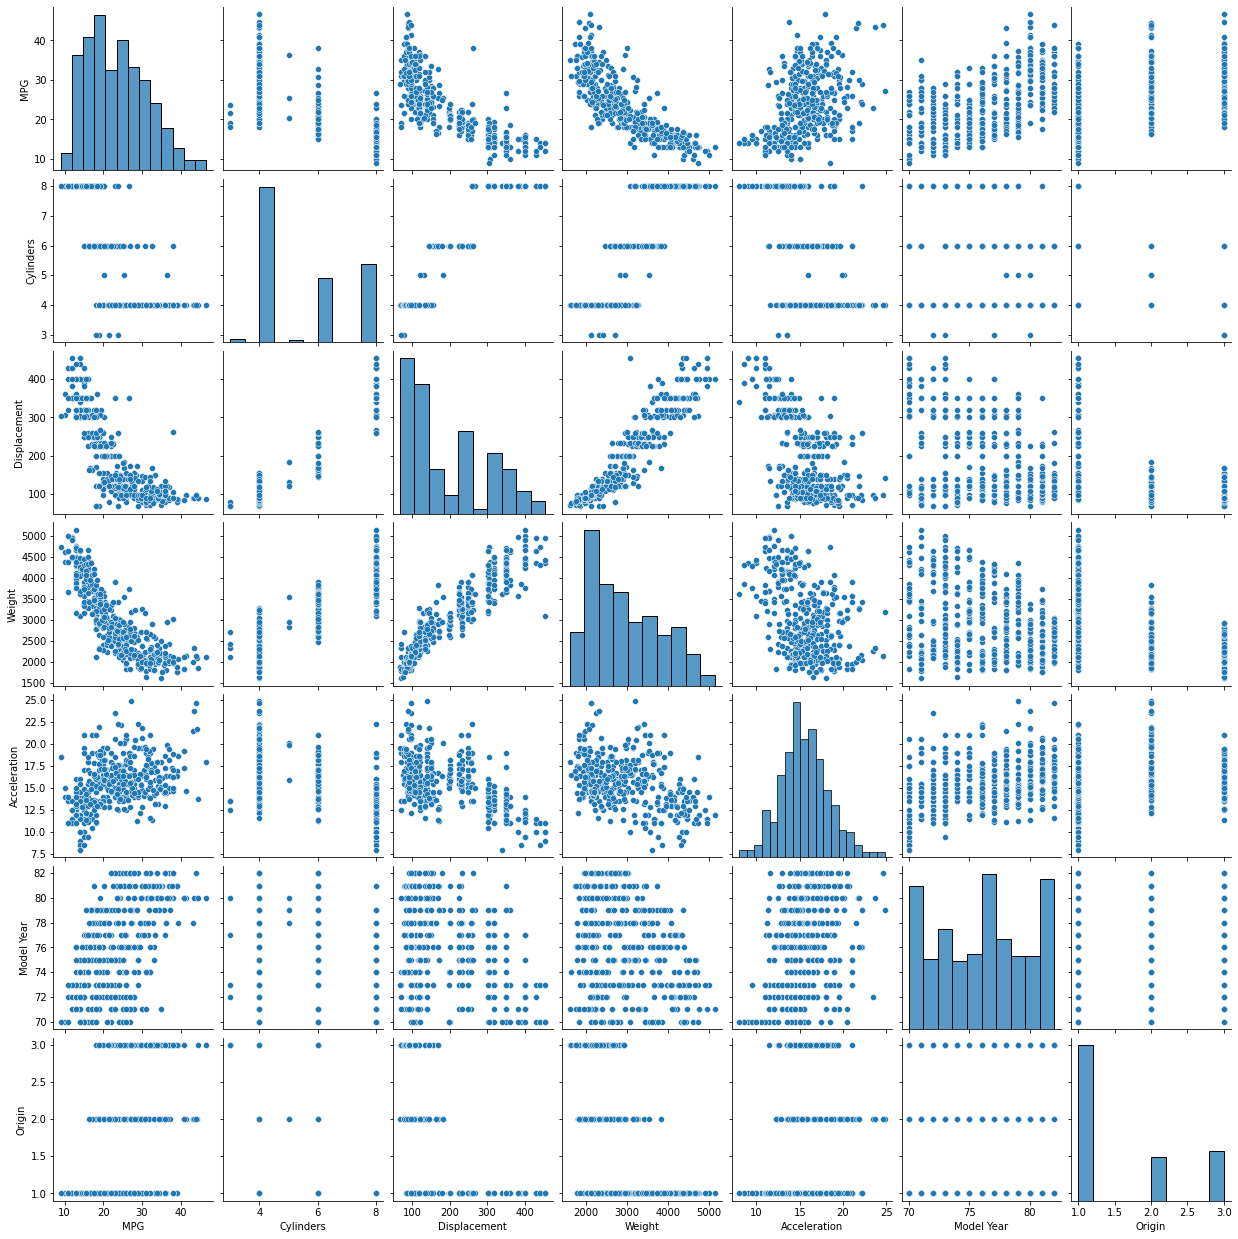

In [ ]:
# Pairplot to get a feel of the possible correlations in the data
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Acceleration", "Model Year", "Origin"]])